In [1]:
import pandas as pd
import numpy as np
import yfinance as yf

# Day 1

## 1.1. Data import

In [2]:
# TSM (Tech), JPM (Finanse), XOM (Energia), EEM (Rynki Wschodzące), SPY (Benchmark)
tickers = ['TSM', 'AAPL', 'JPM', 'XOM', 'EEM', 'SPY', 'GLD', 'BND']

start_date = '2019-01-01'
end_date = '2024-01-01'

# yfinance pobiera wiele metryk naraz. Od razu izolujemy 'Adj Close' na końcu wywołania.
# Używanie Adjusted Close jest krytyczne w modelach portfelowych, bo uwzględnia dywidendy i splity akcji.
data = yf.download(tickers, start=start_date, end=end_date, auto_adjust=False)

[*********************100%***********************]  8 of 8 completed


In [3]:
data.head()

Price       Adj Close                                               \
Ticker           AAPL        BND        EEM         GLD        JPM   
Date                                                                 
2019-01-02  37.503723  64.516899  33.319092  121.330002  81.250214   
2019-01-03  33.768074  64.768875  32.714996  122.430000  80.095505   
2019-01-04  35.209606  64.573799  33.770042  121.440002  83.048279   
2019-01-07  35.131237  64.476242  33.846615  121.860001  83.105995   
2019-01-08  35.800957  64.394928  33.974243  121.529999  82.949287   

Price                                             Close             ...  \
Ticker             SPY        TSM        XOM       AAPL        BND  ...   
Date                                                                ...   
2019-01-02  224.995361  31.237240  50.001854  39.480000  79.370003  ...   
2019-01-03  219.626297  29.389702  49.234127  35.547501  79.680000  ...   
2019-01-04  226.982849  29.911465  51.049374  37.064999  79.440002  ...   
2019-01-07  228.772537  30.133848  51.314850  36.982498  79.320000  ...   
2019-01-08  230.921951  29.885798  51.687939  37.687500  79.220001  ...   

Price            Open                Volume                                \
Ticker            TSM        XOM       AAPL      BND        EEM       GLD   
Date                                                                        
2019-01-02  36.200001  67.349998  148158800  4142500   57198800  12776200   
2019-01-03  35.340000  70.000000  365248800  4908400   62767600  15440800   
2019-01-04  34.459999  69.639999  234428400  4583600  103055100  13334000   
2019-01-07  35.009998  71.250000  219111200  4121700   76597000   7473600   
2019-01-08  35.110001  72.540001  164101200  1745400   70518200   7643100   

Price                                                
Ticker           JPM        SPY       TSM       XOM  
Date                                                 
2019-01-02  15670900  126925200   5273100  16727200  
2019-01-03  16286400  144140700  15998000  13866100  
2019-01-04  16935200  142628800  14178200  16043600  
2019-01-07  15430700  103139100   6850800  10844200  
2019-01-08  13578800  102512600  11462600  11439000  

[5 rows x 48 columns]

In [4]:
data = data['Adj Close']

In [5]:
data.shape

(1258, 8)

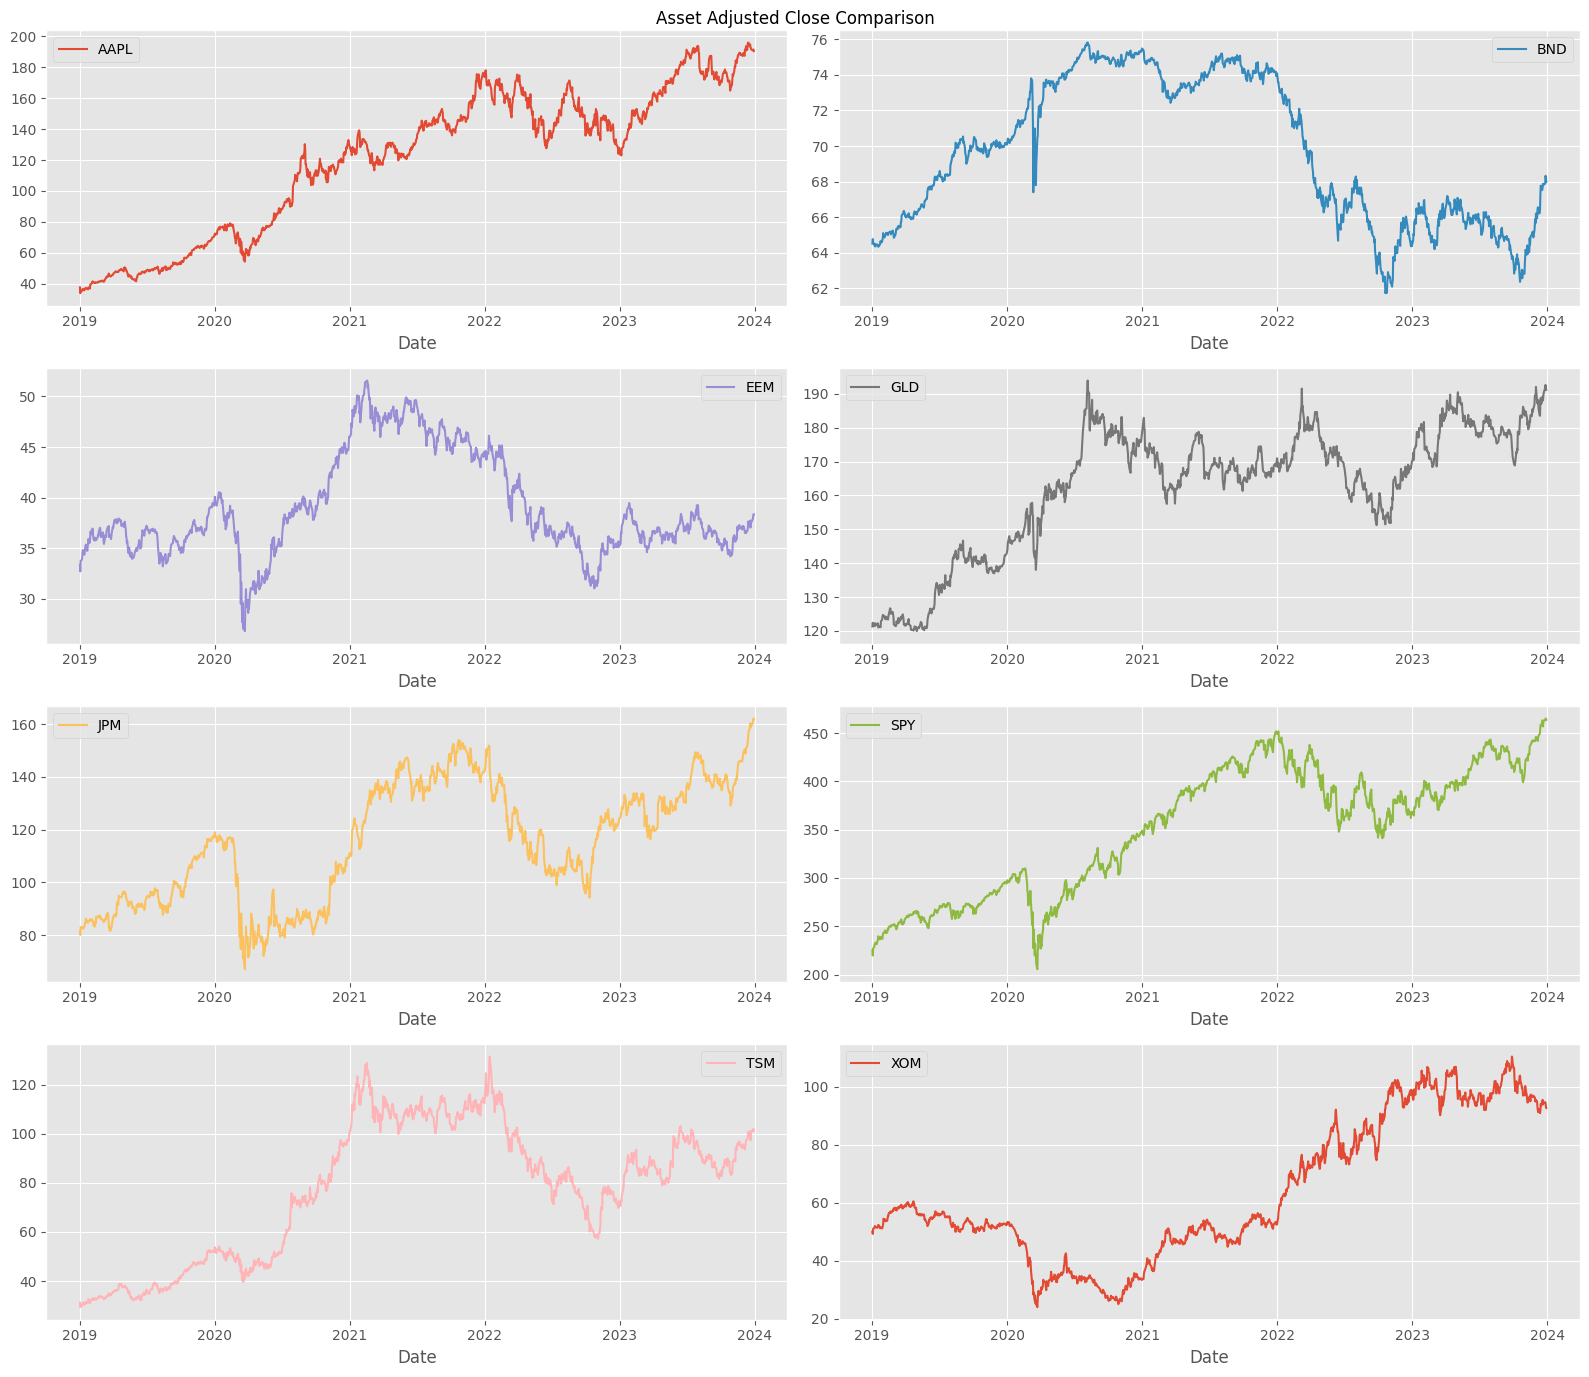

In [6]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')

axes = data.plot(
    subplots=True, 
    layout=(4, 2),       
    figsize=(16, 14),  
    sharex=False,    
    grid=True,             
    linewidth=1.5,
    title="Asset Adjusted Close Comparison",
)
plt.tight_layout()      


## 1.2. Data Cleaning

In [7]:
print("Missing Data:", data.isnull().sum().sum())

Missing Data: 0


In [8]:
data.dropna()

Ticker,AAPL,BND,EEM,GLD,JPM,SPY,TSM,XOM
Date,,,,,,,,
2019-01-02,37.503723,64.516899,33.319092,121.330002,81.250214,224.995361,31.237240,50.001854
2019-01-03,33.768074,64.768875,32.714996,122.430000,80.095505,219.626297,29.389702,49.234127
2019-01-04,35.209606,64.573799,33.770042,121.440002,83.048279,226.982849,29.911465,51.049374
2019-01-07,35.131237,64.476242,33.846615,121.860001,83.105995,228.772537,30.133848,51.314850
2019-01-08,35.800957,64.394928,33.974243,121.529999,82.949287,230.921951,29.885798,51.687939
...,...,...,...,...,...,...,...,...
2023-12-22,191.609467,67.826859,37.554218,190.270004,159.387573,462.223358,100.357918,94.430145
2023-12-26,191.065125,67.891594,37.849842,191.720001,160.330185,464.175079,101.622719,94.643265
2023-12-27,191.164078,68.326134,38.069180,192.589996,161.291824,465.014343,101.817322,94.198502


## 1.3. Calculating Daily Log Returns

In [9]:
data.head()

Ticker,AAPL,BND,EEM,GLD,JPM,SPY,TSM,XOM
Date,,,,,,,,
2019-01-02,37.503723,64.516899,33.319092,121.330002,81.250214,224.995361,31.237240,50.001854
2019-01-03,33.768074,64.768875,32.714996,122.430000,80.095505,219.626297,29.389702,49.234127
2019-01-04,35.209606,64.573799,33.770042,121.440002,83.048279,226.982849,29.911465,51.049374
2019-01-07,35.131237,64.476242,33.846615,121.860001,83.105995,228.772537,30.133848,51.314850
2019-01-08,35.800957,64.394928,33.974243,121.529999,82.949287,230.921951,29.885798,51.687939


In [10]:
data.columns.to_list

<bound method IndexOpsMixin.tolist of Index(['AAPL', 'BND', 'EEM', 'GLD', 'JPM', 'SPY', 'TSM', 'XOM'], dtype='str', name='Ticker')>

In [12]:
previous_prices = data.shift(1)
previous_prices


Ticker,AAPL,BND,EEM,GLD,JPM,SPY,TSM,XOM
Date,,,,,,,,
2019-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,37.503723,64.516899,33.319092,121.330002,81.250214,224.995361,31.237240,50.001854
2019-01-04,33.768074,64.768875,32.714996,122.430000,80.095505,219.626297,29.389702,49.234127
2019-01-07,35.209606,64.573799,33.770042,121.440002,83.048279,226.982849,29.911465,51.049374
2019-01-08,35.131237,64.476242,33.846615,121.860001,83.105995,228.772537,30.133848,51.314850
...,...,...,...,...,...,...,...,...
2023-12-22,192.678329,67.872154,37.735405,189.429993,159.482788,461.296265,99.774155,94.263351
2023-12-26,191.609467,67.826859,37.554218,190.270004,159.387573,462.223358,100.357918,94.430145
2023-12-27,191.065125,67.891594,37.849842,191.720001,160.330185,464.175079,101.622719,94.643265


In [ ]:
log_returns = np.log(data/previous_prices)
log_returns = log_returns.dropna()  #drops first column
print(log_returns.shape)
log_returns.head()

(1257, 8)


Ticker,AAPL,BND,EEM,GLD,JPM,SPY,TSM,XOM
Date,,,,,,,,
2019-01-03,-0.104924,0.003898,-0.018297,0.009025,-0.014314,-0.024152,-0.060967,-0.015473
2019-01-04,0.041803,-0.003016,0.031741,-0.008119,0.036202,0.032947,0.017598,0.036206
2019-01-07,-0.002228,-0.001512,0.002265,0.003453,0.000695,0.007854,0.007407,0.005187
2019-01-08,0.018884,-0.001262,0.003764,-0.002712,-0.001887,0.009352,-0.008266,0.007244
2019-01-09,0.016839,0.001387,0.017625,0.006398,-0.001692,0.004662,0.018994,0.005261


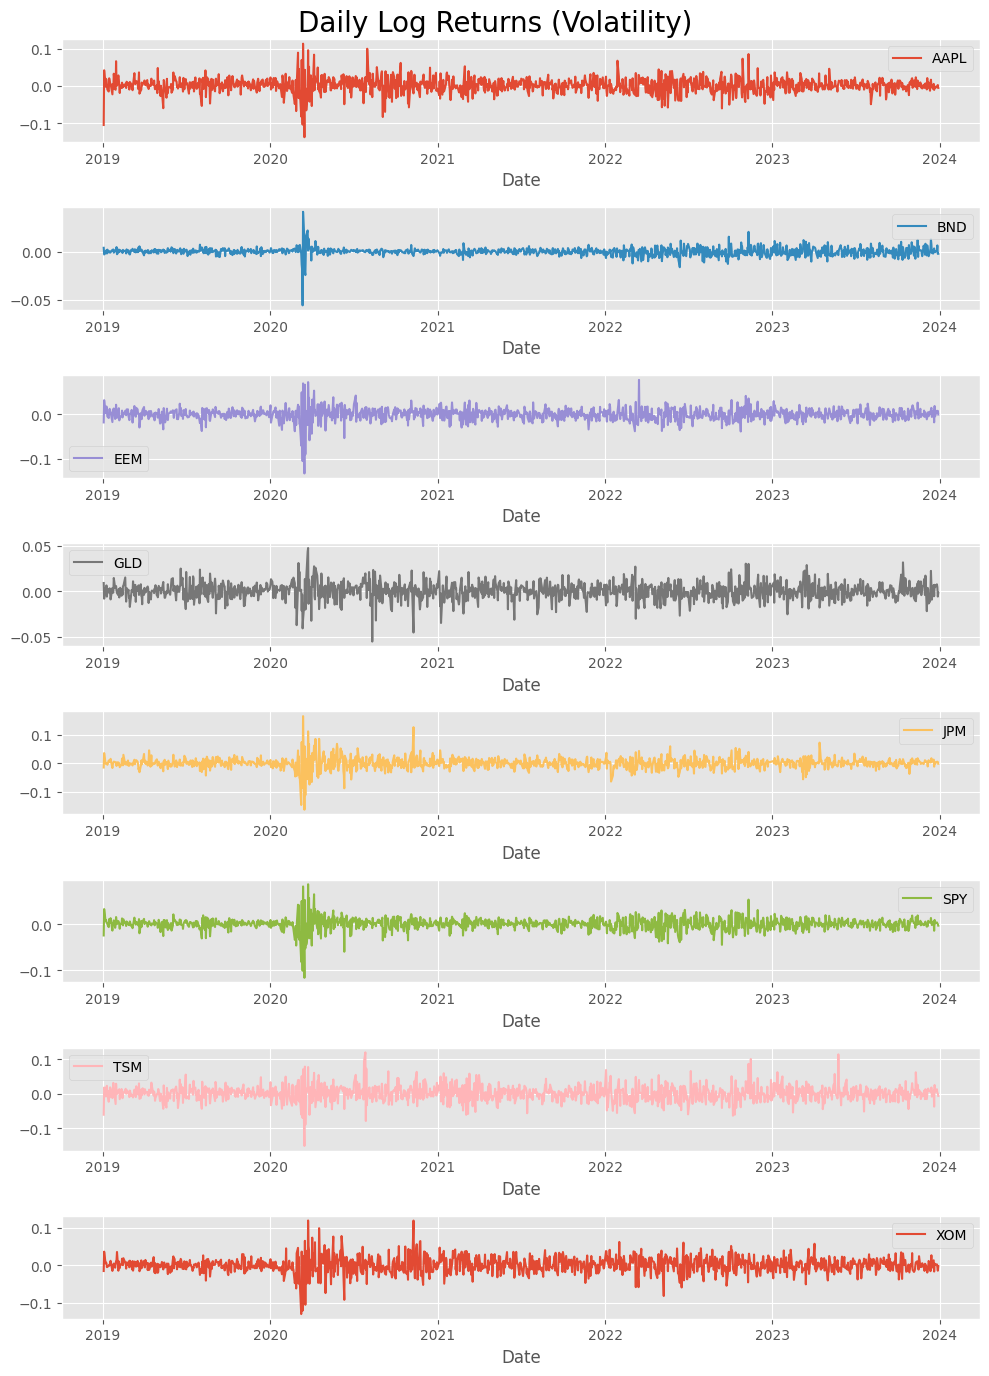

In [34]:
log_returns.plot(figsize=(10,14), subplots=True, sharex=False)
plt.suptitle('Daily Log Returns (Volatility)', fontsize=20)

plt.tight_layout()


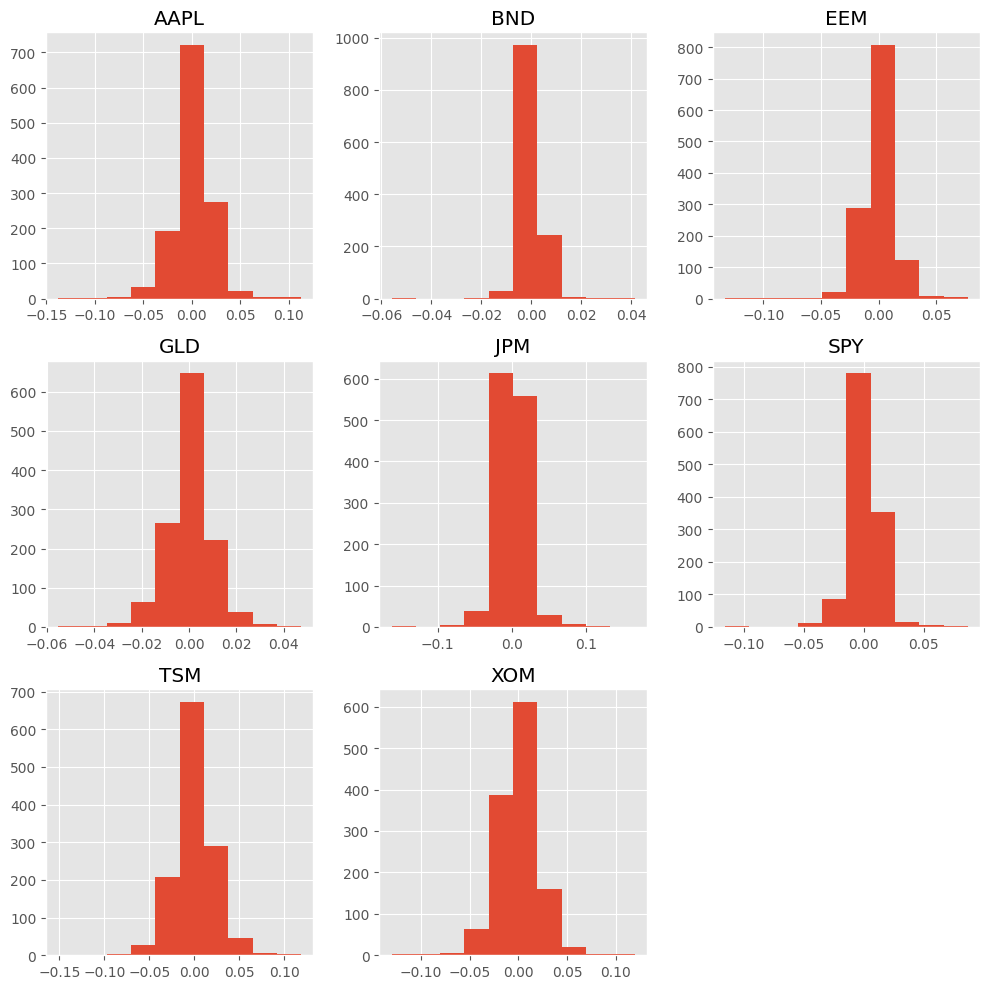

In [ ]:
#returns histogram
log_returns.hist(figsize=(10,10))
plt.tight_layout()

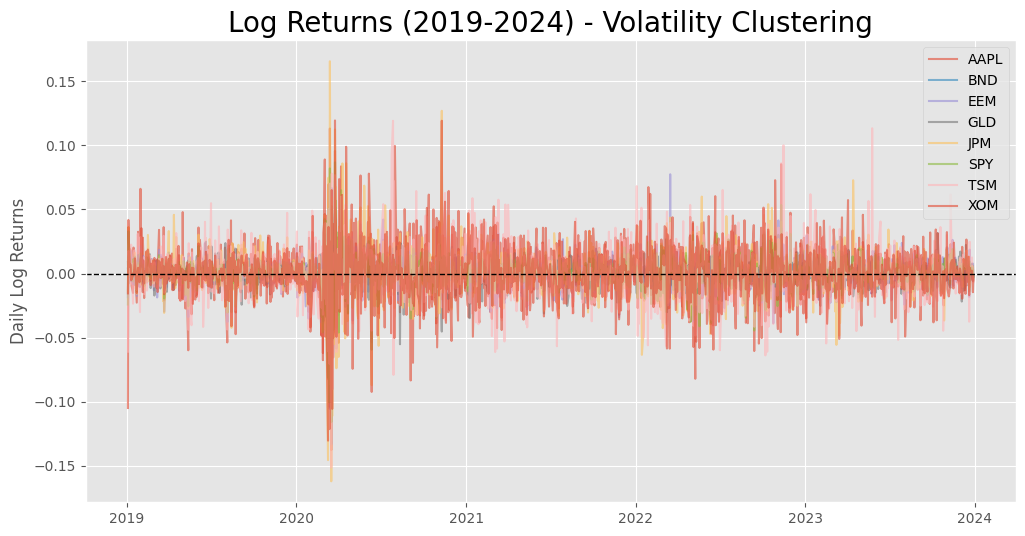

In [47]:
import matplotlib.pyplot as plt

# --- 1. Szereg czasowy (Wizualizacja Volatility Clustering) ---
# Powinieneś zauważyć, że w okresach kryzysów (np. marzec 2020) 
# wykres "szaleje" (duże odchylenia od zera) dla wszystkich aktywów naraz.
plt.figure(figsize=(12, 6))
plt.plot(log_returns, alpha=0.6)
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.title('Log Returns (2019-2024) - Volatility Clustering', fontsize=20)
plt.ylabel('Daily Log Returns')
plt.legend(log_returns.columns)
plt.show()


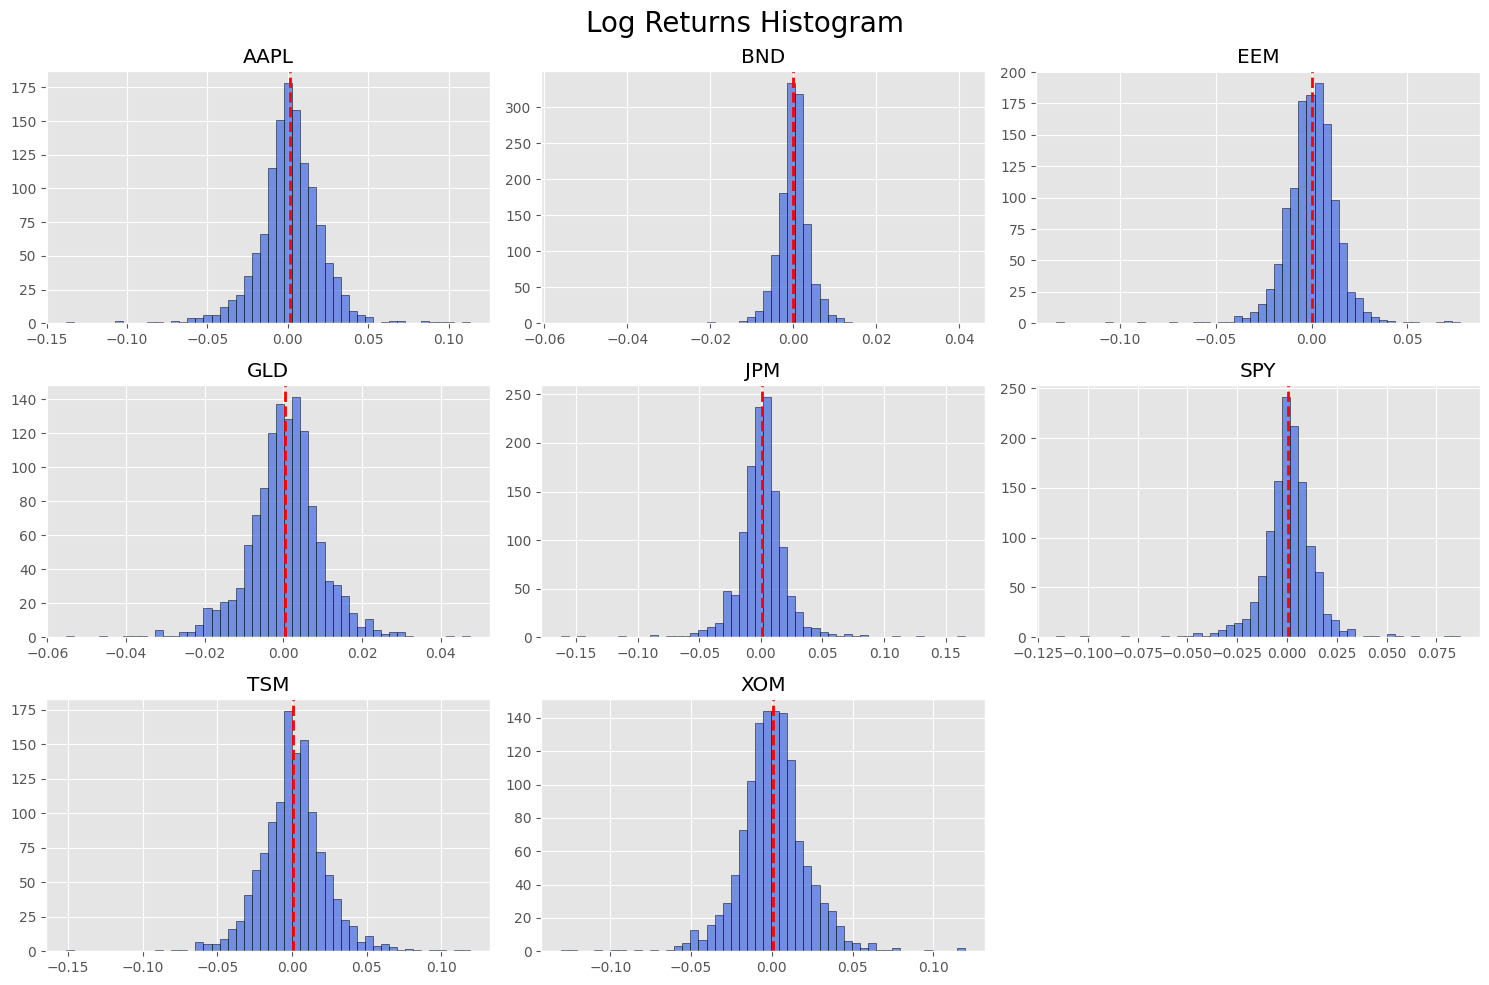

In [61]:
import matplotlib.pyplot as plt

# 1. Generujemy wykresy i zapisujemy wynik (tablicę osi) do zmiennej 'axes'
axes = log_returns.hist(bins=50, figsize=(15, 10), color='royalblue', edgecolor='black', alpha=0.7)

# 2. Iterujemy przez każdy pojedynczy subplot w wygenerowanej siatce
for ax in axes.flatten():
    # Pandas domyślnie ustawia tytuł subplota jako nazwę kolumny (np. 'SPY')
    ticker = ax.get_title()
    
    # Zabezpieczenie: przy nieparzystej liczbie kolumn matplotlib tworzy puste okienka na końcu.
    # Sprawdzamy, czy tytuł wykresu faktycznie odpowiada kolumnie w naszych danych.
    if ticker in log_returns.columns:
        # Liczymy średnią dla tego konkretnego aktywa
        mean_val = log_returns[ticker].mean()
        
        # Rysujemy linię na tym konkretnym osi (ax)
        ax.axvline(mean_val, color='red', linestyle='dashed', linewidth=2)

plt.suptitle('Log Returns Histogram', fontsize=20, fontweight=14)
plt.tight_layout()
plt.show()

## 1.4. Covariance and the Covariance Martix

### Intuition - in normal covariance we are measuring deviations from a population average. in the financial context, we need to measure deviations from an average daily return (hence why we use the log returns dataframe as our data for the function)

In [65]:
daily_covar_martix = log_returns.cov()

In [66]:
trading_days = 252

In [ ]:
#the main diagonal of this is the annualized VARIANCE (covariance with itself)
annualized_covar_matrix = daily_covar_martix * 252
annualized_covar_matrix

Ticker,AAPL,BND,EEM,GLD,JPM,SPY,TSM,XOM
Ticker,,,,,,,,
AAPL,0.104004,0.003023,0.044897,0.004116,0.047067,0.054788,0.065439,0.035702
BND,0.003023,0.004583,0.002593,0.003841,0.000653,0.002653,0.002432,-0.000732
EEM,0.044897,0.002593,0.050666,0.006315,0.043811,0.036959,0.055228,0.037788
GLD,0.004116,0.003841,0.006315,0.022351,-0.002446,0.003392,0.006189,0.003077
JPM,0.047067,0.000653,0.043811,-0.002446,0.101372,0.049386,0.048264,0.064863
SPY,0.054788,0.002653,0.036959,0.003392,0.049386,0.044448,0.047560,0.040244
TSM,0.065439,0.002432,0.055228,0.006189,0.048264,0.047560,0.126200,0.038406
XOM,0.035702,-0.000732,0.037788,0.003077,0.064863,0.040244,0.038406,0.117536


In [71]:
#annualized returns (average) 
annualized_returns_average = log_returns.mean() * trading_days
annualized_returns_average

Ticker
AAPL    0.325871
BND     0.010549
EEM     0.028170
GLD     0.091147
JPM     0.138290
SPY     0.145039
TSM     0.235629
XOM     0.123630
dtype: float64

In [73]:
data

Ticker,AAPL,BND,EEM,GLD,JPM,SPY,TSM,XOM
Date,,,,,,,,
2019-01-02,37.503723,64.516899,33.319092,121.330002,81.250214,224.995361,31.237240,50.001854
2019-01-03,33.768074,64.768875,32.714996,122.430000,80.095505,219.626297,29.389702,49.234127
2019-01-04,35.209606,64.573799,33.770042,121.440002,83.048279,226.982849,29.911465,51.049374
2019-01-07,35.131237,64.476242,33.846615,121.860001,83.105995,228.772537,30.133848,51.314850
2019-01-08,35.800957,64.394928,33.974243,121.529999,82.949287,230.921951,29.885798,51.687939
...,...,...,...,...,...,...,...,...
2023-12-22,191.609467,67.826859,37.554218,190.270004,159.387573,462.223358,100.357918,94.430145
2023-12-26,191.065125,67.891594,37.849842,191.720001,160.330185,464.175079,101.622719,94.643265
2023-12-27,191.164078,68.326134,38.069180,192.589996,161.291824,465.014343,101.817322,94.198502


In [76]:
#variances and volatilities
annual_variances = np.diag(annualized_covar_matrix)
print(annual_variances)

annual_volatilities = np.sqrt(annual_variances)
print(annual_volatilities)

volatility_series = pd.Series(annual_volatilities, index=annualized_covar_matrix.columns)

print("--- ANNUALIZED VOLATILITY ---")
print(volatility_series)

[0.10400373 0.0045833  0.05066613 0.02235115 0.10137246 0.04444847
 0.12619993 0.11753568]
[0.32249609 0.06770008 0.22509138 0.14950301 0.31839043 0.21082806
 0.3552463  0.34283477]
--- ANNUALIZED VOLATILITY ---
Ticker
AAPL    0.322496
BND     0.067700
EEM     0.225091
GLD     0.149503
JPM     0.318390
SPY     0.210828
TSM     0.355246
XOM     0.342835
dtype: float64


## Apple EDA

In [11]:
apple = yf.Ticker('AAPL')

In [17]:
all = apple.history(period='max')
all

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12 00:00:00-05:00,0.098298,0.098725,0.098298,0.098298,469033600,0.0,0.0
1980-12-15 00:00:00-05:00,0.093597,0.093597,0.093169,0.093169,175884800,0.0,0.0
1980-12-16 00:00:00-05:00,0.086758,0.086758,0.086331,0.086331,105728000,0.0,0.0
1980-12-17 00:00:00-05:00,0.088468,0.088895,0.088468,0.088468,86441600,0.0,0.0
1980-12-18 00:00:00-05:00,0.091033,0.091460,0.091033,0.091033,73449600,0.0,0.0
...,...,...,...,...,...,...,...
2026-02-13 00:00:00-05:00,262.010010,262.230011,255.449997,255.779999,56290700,0.0,0.0
2026-02-17 00:00:00-05:00,258.049988,266.290009,255.539993,263.880005,58469100,0.0,0.0
2026-02-18 00:00:00-05:00,263.600006,266.820007,262.450012,264.350006,34203300,0.0,0.0


In [22]:
apple.quarterly_financials

,2025-12-31,2025-09-30,2025-06-30,2025-03-31,2024-12-31
Tax Effect Of Unusual Items,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Tax Rate For Calcs,1.750000e-01,1.627240e-01,1.640000e-01,1.550000e-01,1.470000e-01
Normalized EBITDA,5.406600e+10,3.555400e+10,3.103200e+10,3.225000e+10,4.591200e+10
Net Income From Continuing Operation Net Minority Interest,4.209700e+10,2.746600e+10,2.343400e+10,2.478000e+10,3.633000e+10
Reconciled Depreciation,3.214000e+09,3.127000e+09,2.830000e+09,2.661000e+09,3.080000e+09
Reconciled Cost Of Revenue,7.452500e+10,5.412500e+10,5.031800e+10,5.049200e+10,6.602500e+10
EBITDA,5.406600e+10,3.555400e+10,3.103200e+10,3.225000e+10,4.591200e+10
EBIT,5.085200e+10,3.242700e+10,2.820200e+10,2.958900e+10,4.283200e+10
Normalized Income,4.209700e+10,2.746600e+10,2.343400e+10,2.478000e+10,3.633000e+10
Net Income From Continuing And Discontinued Operation,4.209700e+10,2.746600e+10,2.343400e+10,2.478000e+10,3.633000e+10


In [23]:
apple.major_holders

Breakdown,Value
insidersPercentHeld,0.01840
institutionsPercentHeld,0.65307
institutionsFloatPercentHeld,0.66531
institutionsCount,7458.00000


In [24]:
apple.institutional_holders

,Date Reported,Holder,pctHeld,Shares,Value,pctChange
0,2025-12-31,Vanguard Group Inc,0.0972,1426283914,380404170515,0.0192
1,2025-12-31,Blackrock Inc.,0.0786,1154665731,307960887248,0.0073
2,2025-12-31,State Street Corporation,0.0411,604056505,161107905286,0.0110
3,2025-12-31,"Geode Capital Management, LLC",0.0244,358032517,95490849549,0.0052
4,2025-12-31,"FMR, LLC",0.0209,307397264,81985921654,0.0137
5,2025-12-31,Morgan Stanley,0.0157,230483035,61472128295,0.0060
6,2025-12-31,"Berkshire Hathaway, Inc",0.0155,227917808,60787956624,-0.0432
7,2025-12-31,JPMORGAN CHASE & CO,0.0154,225419111,60121529168,-0.5237
8,2025-12-31,Price (T.Rowe) Associates Inc,0.0139,203499482,54275345105,-0.0435
9,2025-12-31,NORGES BANK,0.0131,192255086,51276352344,0.0129


In [30]:
apple.recommendations_summary

,period,strongBuy,buy,hold,sell,strongSell
0,0m,5,24,16,1,1
1,-1m,6,23,15,1,2
2,-2m,5,24,15,1,3
3,-3m,5,24,15,1,3


array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>], dtype=object)

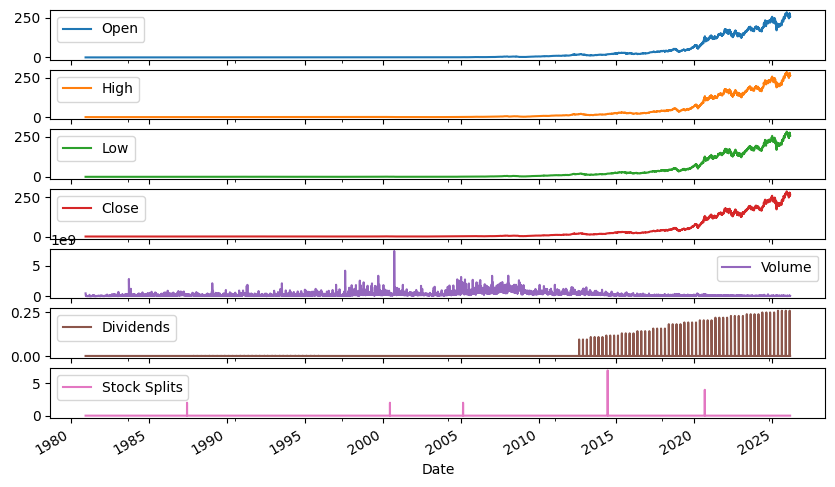

In [34]:
all.plot(figsize=(10,6), subplots=True)